In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%run utils.ipynb

In [2]:
dos_df_path,fuzzy_df_path,attack_free_df_path=load_data_paths_from_config_to_notebooks("out_paths")

In [3]:
dos_df_pl = pl.read_csv(dos_df_path)
fuzzy_df_pl= pl.read_csv(fuzzy_df_path)
attack_free_df_pl= pl.read_csv(attack_free_df_path)

In [4]:
def convert_pl_to_pd(df):
    return df.to_pandas()

In [5]:
def convert_multiple_pls_to_pds(dfs):
    return [convert_pl_to_pd(df)  for df in dfs]

In [6]:
dos_df_pd,fuzzy_df_pd,attack_free_df_pd=convert_multiple_pls_to_pds([dos_df_pl,fuzzy_df_pl,attack_free_df_pl])

In [7]:
def return_injected_messages_from_dfs(dfs):
    return [df[df["updatedFlag"]=='T'] for df in dfs]


In [8]:
def return_normal_messages_from_dfs(dfs):
    return [df[df["updatedFlag"]=='R'] for df in dfs]


In [9]:
attack_free_in_dos,attack_free_in_fuzzy=return_normal_messages_from_dfs([dos_df_pd,fuzzy_df_pd])
dos_df,fuzzy_df=return_injected_messages_from_dfs([dos_df_pd,fuzzy_df_pd])
attack_free_df=pd.concat([attack_free_df_pd,attack_free_in_dos,attack_free_in_fuzzy])

In [11]:
dos_df["attackType"]=1
fuzzy_df["attackType"]=2
attack_free_df["attackType"]=0


C:\Users\Naz\AppData\Local\Temp\ipykernel_4184\2067426196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos_df["attackType"]=1
C:\Users\Naz\AppData\Local\Temp\ipykernel_4184\2067426196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuzzy_df["attackType"]=2


## Common Methods

In [12]:
def plot_bar_plot(df, column_names):
    if len(column_names) != 2:
        raise ValueError("`column_names` must contain exactly two elements: [x_column, y_column].")
    
    plt.figure(figsize=(12, 6)) 
    
    sns.barplot(x=column_names[0], y=column_names[1], data=df, palette="viridis")

    plt.xlabel(column_names[0], fontsize=14)
    plt.ylabel(column_names[1], fontsize=14)
    plt.title(f"{column_names[0]}-{column_names[1]}", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()


In [13]:
def plot_count_chart(df,column_name):
    plt.figure(figsize=(10,8))
    
    sns.countplot(x=column_name, data=df, palette='viridis')
    
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [14]:
def plot_bar_chart_of_percentages(df,column_name):
    counts = Counter(df[column_name])
    categories = list(counts.keys())
    values = list(counts.values())
    
    total = sum(values)
    percentages = [value / total * 100 for value in values]
    
    plt.bar(categories, values)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Bar Chart with Percentages')

    for i, (value, pct) in enumerate(zip(values, percentages)):
        plt.text(i, value, f'{pct:.1f}%', ha='center', fontsize=15)

    plt.show()

In [15]:
def plot_pie_chart(df, column_name):
    data = Counter(df[column_name])
    key_list = list(data.keys())
    val_list = list(data.values())

    fig1, ax1 = plt.subplots()
    wedges, texts, autotexts = ax1.pie(val_list, autopct='%1.1f%%',
                                       shadow=True, startangle=90)
    ax1.legend(wedges, key_list, title="Categories", loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

In [16]:
def plot_hist(df, column_name,bin_number):
    plt.figure(figsize=(8, 6))
    
    plt.hist(df[column_name], bins=bin_number, edgecolor="black", alpha=0.7)

    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column_name}")
    plt.show()

## Univariate Analysis

#### Quick Analysis

In [17]:
print(dos_df.shape)
print(fuzzy_df.shape)
print(attack_free_df.shape)

(587521, 6)
(491847, 6)
(7414132, 6)


In [18]:
# dos_df.head()

In [19]:
# fuzzy_df.head()

In [20]:
# attack_free_df.head()

#### updatedCanId

In [21]:
# plot_count_chart(dos_df,"updatedCanId")

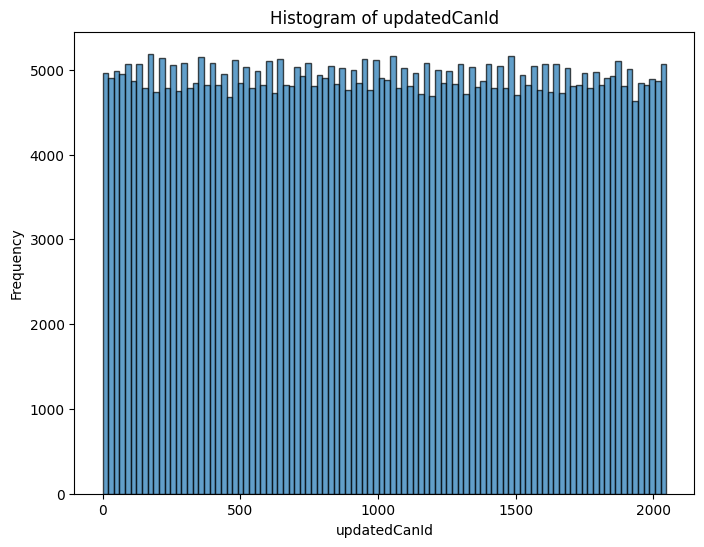

In [22]:
plot_hist(fuzzy_df, "updatedCanId",100)

In [23]:
attack_free_df["updatedCanId"].nunique()


38

In [24]:
# plot_count_chart(attack_free_df,"updatedCanId")

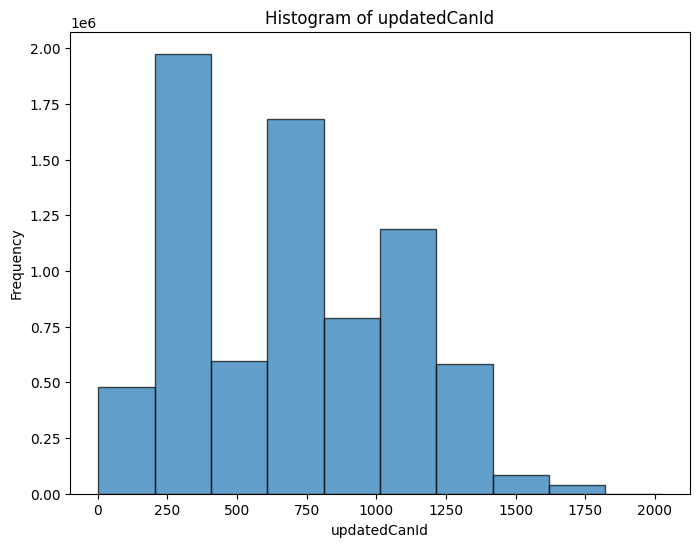

In [25]:
plot_hist(attack_free_df, "updatedCanId",10)

#### dlc

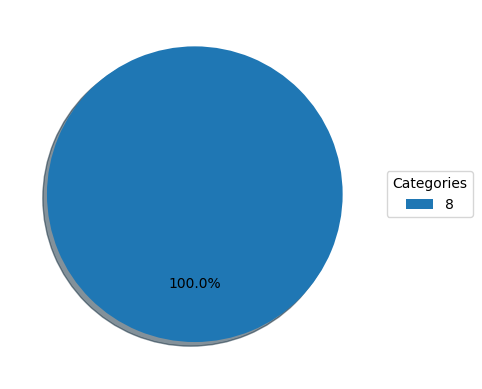

In [26]:
plot_pie_chart(dos_df,"dlc")

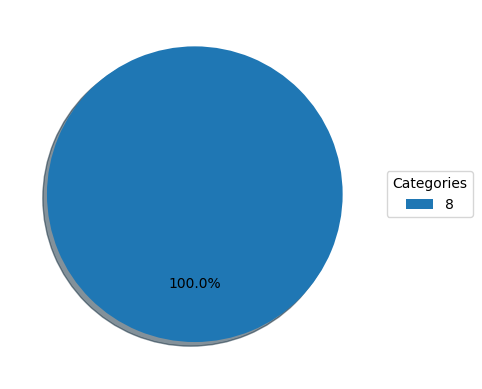

In [27]:
plot_pie_chart(fuzzy_df,"dlc")

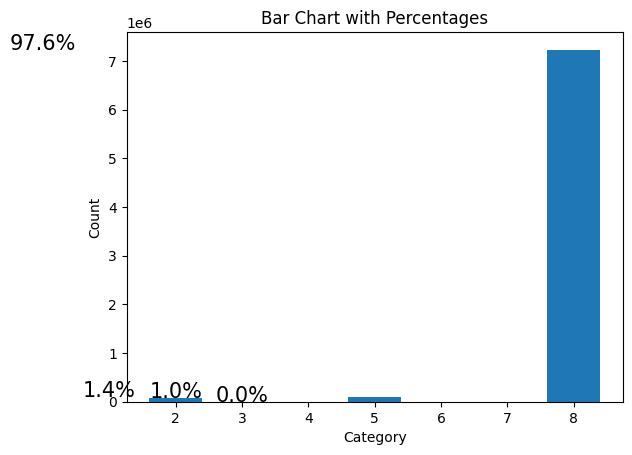

In [28]:
plot_bar_chart_of_percentages(attack_free_df,"dlc")

In [29]:
attack_free_df["dlc"].value_counts()

dlc
8    7234373
5     104057
2      75699
6          3
Name: count, dtype: int64

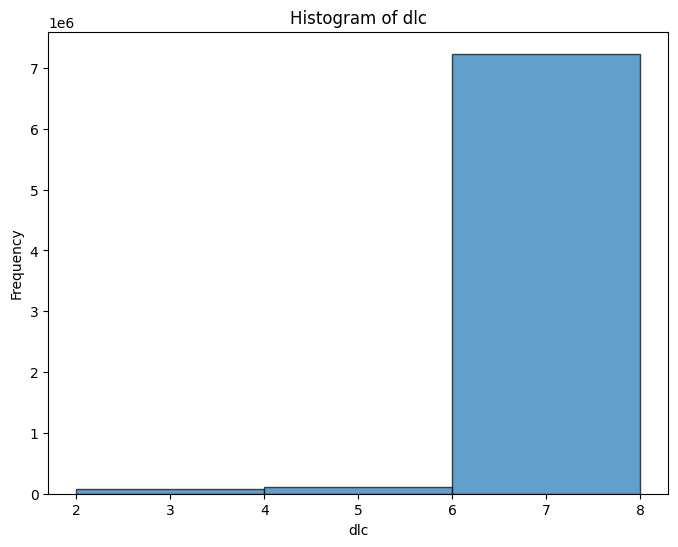

In [30]:
plot_hist(attack_free_df, "dlc",3)

#### updatedFlag

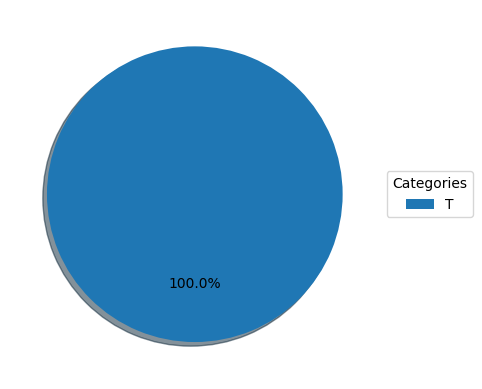

In [31]:
plot_pie_chart(dos_df,"updatedFlag")

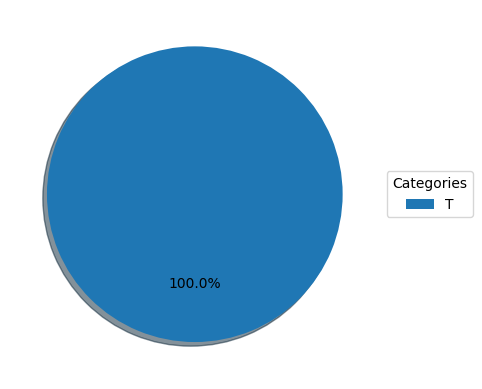

In [32]:
plot_pie_chart(fuzzy_df,"updatedFlag")

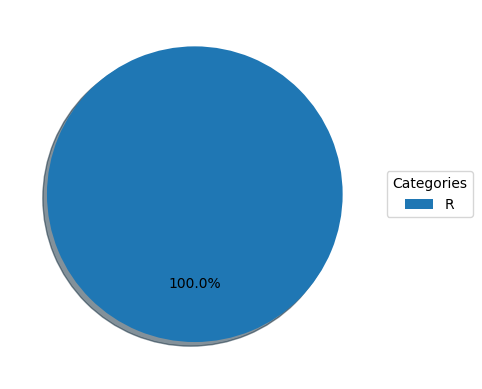

In [33]:
plot_pie_chart(attack_free_df,"updatedFlag")

### Insights about Univariate Analysis


#### **Shape**
- **DOS Dataset:** Shape is `(587,521, 6)`  
- **Fuzzy Dataset:** Shape is `(491,847, 6)`  
- **Attack-Free Dataset:** Shape is `(7,414,132, 6)`  

#### **Updated CAN ID**
- **DOS Dataset:** Contains only a single value: `0`.  
- **Fuzzy Dataset:** 
  - Contains **2,048 unique IDs** ranging between `0` and `2,047`.  
  - Observing the top 100 most used IDs reveals a **uniform distribution**.  
- **Attack-Free Dataset:** 
  - Contains **38 unique IDs** with a **non-normal distribution**.  
  - This dataset appears to be a **combination of multiple sources**, as it includes attack-free samples from the DOS, Fuzzy, and original attack-free datasets.  

#### **DLC (Data Length Code)**
- **DOS Dataset:** Limited to **8 as unique value**.  
- **Fuzzy Dataset:** Limited to **8 as unique value**.  
- **Attack-Free Dataset:** Includes values such as **2, 5, 6, and 8**, but values other than `8` are **extremely rare**. These may be removed during data cleaning for simplification.  

#### **Updated Flag**
- **DOS Dataset:** All values are labeled as `injected`.  
- **Fuzzy Dataset:** All values are labeled as `injected`.  
- **Attack-Free Dataset:** All values are labeled as `normal`.  
